<a href="https://colab.research.google.com/github/SUMEDHFORTES/replit-github-sync-tool/blob/main/Traffic_Video_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving traffic.mp4 to traffic.mp4



0: 384x640 5 persons, 7 cars, 2 motorcycles, 2 buss, 5 trucks, 355.8ms
Speed: 21.2ms preprocess, 355.8ms inference, 39.7ms postprocess per image at shape (1, 3, 384, 640)


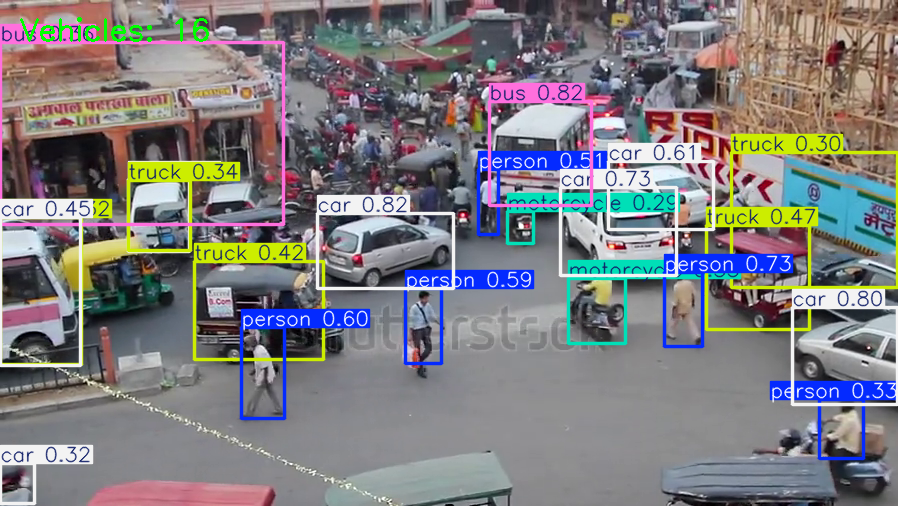

In [ ]:
cap = cv2.VideoCapture("traffic.mp4")

vehicle_classes = [1, 2, 3, 5, 7]  # bicycle, car, motorbike, bus, truck

frame_no = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_no += 1
    if frame_no % 30 != 0:  # skip some frames for speed
        continue

    results = model(frame)
    detections = results[0]

    vehicle_count = 0
    for box in detections.boxes:
        cls_id = int(box.cls[0])
        if cls_id in vehicle_classes:
            vehicle_count += 1

    annotated_frame = results[0].plot()
    cv2.putText(annotated_frame, f"Vehicles: {vehicle_count}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2_imshow(annotated_frame)  # show in Colab
    break  # remove this break if you want to process more frames

cap.release()

In [ ]:
cap = cv2.VideoCapture("traffic.mp4")
out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 20,
                      (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

cap.release()
out.release()


0: 384x640 13 persons, 9 cars, 1 motorcycle, 3 buss, 3 trucks, 175.4ms
Speed: 5.9ms preprocess, 175.4ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 7 cars, 1 motorcycle, 3 buss, 2 trucks, 198.3ms
Speed: 6.8ms preprocess, 198.3ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 8 cars, 2 motorcycles, 3 buss, 2 trucks, 170.8ms
Speed: 6.8ms preprocess, 170.8ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 8 cars, 2 buss, 3 trucks, 172.8ms
Speed: 6.4ms preprocess, 172.8ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 9 cars, 1 motorcycle, 2 buss, 2 trucks, 161.5ms
Speed: 5.7ms preprocess, 161.5ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 9 cars, 2 motorcycles, 3 buss, 2 trucks, 165.9ms
Speed: 5.9ms preprocess, 165.9ms inference, 5.2ms postprocess per image at shape (1, 3, 384

In [ ]:
from google.colab import files
files.download("output.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>